In [1]:
import statistics as stat

72


In [2]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
basepath = '/gpfs/scratch/smdick/'
# paths = ['md_siesta_descr/md_siesta',
#          'md_siesta_mull/md_siesta',
#          'md_siesta_mull_szp/md_siesta',
#          'md_siesta_descr_szp_uncorrected/md_siesta',
#          'mbpol/md_siesta_pure/md_siesta_10',
#          'mbpol/nose_128_10']
paths = ['md_siesta_mixer_uf_5/md_siesta',
         'md_siesta_mixer_uf_8/md_siesta',
         'md_siesta_mixer_uf_10/md_siesta',
         'md_siesta_mixer_uf_15/md_siesta',
         'mbpol/md_siesta_pure/md_siesta_10']
# basepath = '/gpfs/scratch/smdick/mixer/'
# paths = ['descr_szp_5/md_siesta',
#          'descr_sz_5/md_siesta',
#          'mull_szp_5/md_siesta',
#          'mull_szp_10/md_siesta',
#          '../mbpol/md_siesta_pure/md_siesta_10']
t_equib = 200
dt = 5

In [26]:
r_oh_list = []
for p in paths:
    r_oh_list.append(stat.get_roh(basepath + p, t_equib, dt, dt))


In [27]:
r_oo_list = []
for p in paths:
    r_oo_list.append(stat.get_roo(basepath + p, t_equib, dt, dt))


In [28]:
r_hh_list = []
for p in paths:
    r_hh_list.append(stat.get_rhh(basepath + p, t_equib, dt, dt))


In [29]:
runtimes = []
for p in paths:
    runtimes.append(len(pd.read_csv(basepath + p +'.log', delim_whitespace = True)) / 2000 - t_equib/2000)

In [30]:
runtimes

[3.061, 3.0535, 3.3145, 5.739000000000001, 10.805]

In [31]:
logs = []
for path in paths:
    logs.append(pd.read_csv(basepath + path + '.log', 
                                delim_whitespace = True, index_col = 0).drop('Time[ps]').astype(float))

for log in logs:
    print('T = {:.0f}+/-{:.0f} K'.format(log['T[K]'].mean(), log['T[K]'].std()))

T = 299+/-12 K
T = 299+/-16 K
T = 300+/-64 K
T = 299+/-57 K
T = 299+/-13 K


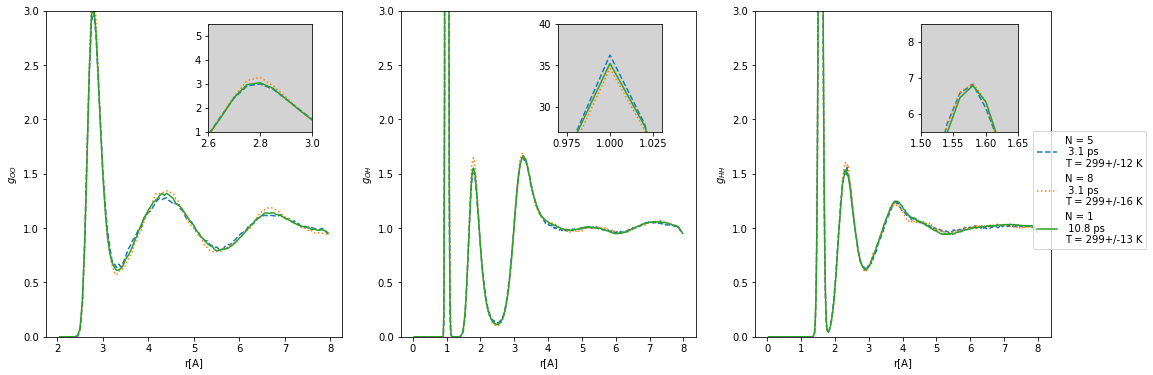

In [32]:
# labels = ['DFT +  ML(RSD)', 'DFT + ML(DM)', 'mulliken szp', 'szp uncorrected', 'DFT', 'MB-pol']
labels = ['N = 5','N = 8','N = 10', 'N = 15', 'N = 1']
# choice = ['mulliken', 'mbpol', 'dzp uncorrected']
# choice = np.array(labels)[[0,-2,-1]]
# choice = np.array(labels)[[0,1,-2,-1]]
choice = np.array(labels)[[0,1,-1]]
# trunc_choice = np.array(labels)[[1,-2]]
# choice = ['descriptor (szp)', 'descriptor (sz)', 'mulliken', 'dzp custom']
# choice = labels
styles = ['--',':','--',':', '-','-']
figure(figsize = (18,6))
bins1 = np.arange(2,8,0.05)[1:]
bins2 = np.arange(0,8,0.02)[1:]

a = 0
b = 0
c = 0
axes_list = [a,b,c]
insets = [[.25, .6, .08, .25], [.52, .6, .08, .25],[.8, .6, .075, .25]]
insets_xlims = [[2.6,3.0], [0.97,1.03], [1.50,1.65]]
insets_ylims = [[1.0,5.5], [27,40], [5.5,8.5]]

# insets_xlims = [[2.6,3.0], [0.95,1.01], [1.50,1.65]]
# insets_ylims = [[2.0,3.5], [32,60], [5.5,10.5]]
min_t = max([len(r_oo) for r_oo in r_oo_list])
max_t = max([len(r_oo) for r_oo in r_oo_list])
for i, [data,bins,div, t, inset, xl, yl] in enumerate(zip([r_oo_list, r_oh_list, r_hh_list],
                                        [bins1,bins2,bins2],
                                        [1,4,2],
                                        ['OO', 'OH', 'HH'],
                                         insets, insets_xlims, insets_ylims)):
    
    subplot(1,3,i+1)
    for r_oo, l, rt, s in zip(data, labels, runtimes, styles):
        if l in choice:
            if l in trunc_choice:
                trunc_t = min_t
            else:
                trunc_t = max_t
            plot(bins, np.mean(r_oo[:trunc_t], axis = 0)/div, label = l +'\n {:.1f} ps'.format(rt), ls = s)
    
    ylim(0,3.0)
#     xlim(1,8)
    xlabel('r[A]')
    ylabel('$g_{' + t + '}$' )
#     legend()
    axes(inset, facecolor = 'lightgray')
#     xticks([])
#     yticks([])

    for r_oo, l, rt, s, log in zip(data, labels, runtimes, styles, logs):
        if l in choice:
            if l in trunc_choice:
                trunc_t = min_t
            else:
                trunc_t = max_t
                
            plot(bins, np.mean(r_oo[:trunc_t], axis = 0)/div,
                 label = l +'\n {:.1f} ps'.format(rt) + '\nT = {:.0f}+/-{:.0f} K'.format(log['T[K]'].mean(), log['T[K]'].std()),
                 ls = s)
    xlim(*xl)
    ylim(*yl)
legend(bbox_to_anchor=(1.1, .05))
# savefig('../figs/rdfs_mixing_uf.eps')
# savefig('../figs/rdfs_mixing_uf.pdf')